In [172]:
import numpy as np
import pandas as pd
import patsy

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV


import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [173]:
nile_csv='./train.csv'
nile=pd.read_csv(nile_csv)
nile.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [174]:
nile.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
Date                      10506 non-null object
Address                   10506 non-null object
Species                   10506 non-null object
Block                     10506 non-null int64
Street                    10506 non-null object
Trap                      10506 non-null object
AddressNumberAndStreet    10506 non-null object
Latitude                  10506 non-null float64
Longitude                 10506 non-null float64
AddressAccuracy           10506 non-null int64
NumMosquitos              10506 non-null int64
WnvPresent                10506 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 985.0+ KB


In [175]:
nile.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

In [176]:
#nile['date_count']=nile.groupby(['Date']).count().iloc[:,-2]

In [242]:
date_count=pd.DataFrame(nile.groupby(['Date']).size().reset_index(name='counts'))
date_count

,Date,counts
0,2007-05-29,25
1,2007-06-05,60
2,2007-06-26,70
3,2007-06-29,46
4,2007-07-02,74
5,2007-07-11,152
6,2007-07-18,129
7,2007-07-19,45
8,2007-07-25,92
9,2007-07-27,83


In [179]:
nile.isnull().sum().sum()

0

In [180]:
nile['Species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'CULEX ERRATICUS'], dtype=object)

In [181]:
mozzie=nile[['Species','WnvPresent']]
mozzie.head()

,Species,WnvPresent
0,CULEX PIPIENS/RESTUANS,0
1,CULEX RESTUANS,0
2,CULEX RESTUANS,0
3,CULEX PIPIENS/RESTUANS,0
4,CULEX RESTUANS,0


In [182]:
mozzie.groupby(['Species','WnvPresent']).Species.count()

Species                 WnvPresent
CULEX ERRATICUS         0                1
CULEX PIPIENS           0             2459
                        1              240
CULEX PIPIENS/RESTUANS  0             4490
                        1              262
CULEX RESTUANS          0             2691
                        1               49
CULEX SALINARIUS        0               86
CULEX TARSALIS          0                6
CULEX TERRITANS         0              222
Name: Species, dtype: int64

In [183]:
mozzie_dummy = pd.get_dummies(mozzie['Species'])
mozzie_dummy.head()

,CULEX ERRATICUS,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0


In [184]:
mozzie_dummy.drop(labels=['CULEX TERRITANS','CULEX TARSALIS','CULEX SALINARIUS','CULEX ERRATICUS'], axis=1,inplace=True)

In [185]:
mozzie_data = pd.concat([mozzie_dummy, mozzie], axis=1)
mozzie_data.head()

,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,Species,WnvPresent
0,0,1,0,CULEX PIPIENS/RESTUANS,0
1,0,0,1,CULEX RESTUANS,0
2,0,0,1,CULEX RESTUANS,0
3,0,1,0,CULEX PIPIENS/RESTUANS,0
4,0,0,1,CULEX RESTUANS,0


In [186]:
mozzie_data[mozzie_data['WnvPresent'] > 0].describe()

,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,WnvPresent
count,551.000000,551.000000,551.000000,551.0
mean,0.435572,0.475499,0.088929,1.0
std,0.496282,0.499853,0.284900,0.0
min,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,1.0
50%,0.000000,0.000000,0.000000,1.0
75%,1.000000,1.000000,0.000000,1.0
max,1.000000,1.000000,1.000000,1.0


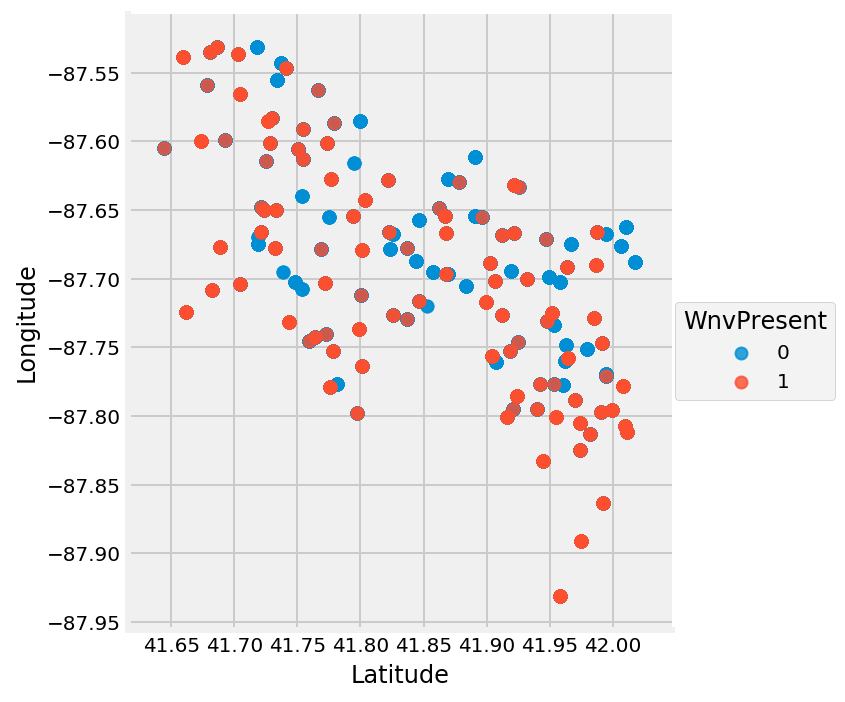

In [187]:
sns.lmplot(x='Latitude', y='Longitude', hue='WnvPresent', data=nile, fit_reg=False)
plt.show()

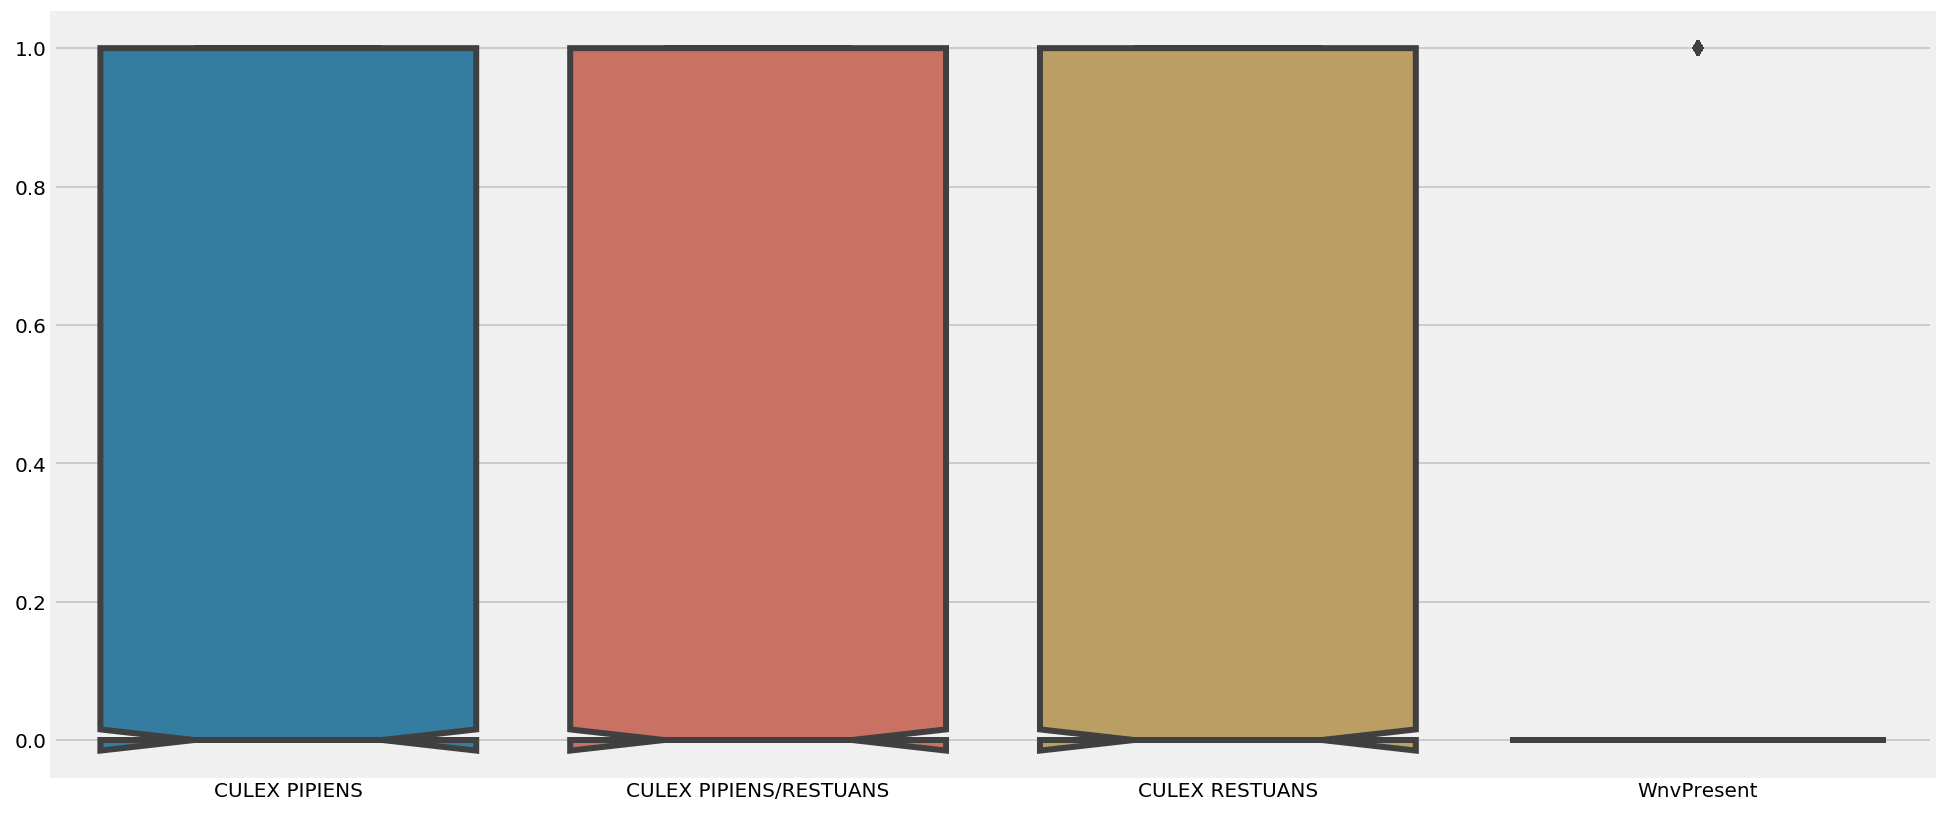

In [188]:
#Boxplot
fig = plt.figure(figsize=(15, 7))
ax = fig.gca()

ax = sns.boxplot(data=mozzie_data, orient='v', fliersize=5, 
                 linewidth=3, notch=True, saturation=0.5, ax=ax)
plt.show()

In [189]:
convert_date = lambda dateTime: pd.to_datetime(dateTime, format='%Y-%m-%d', errors='raise', box=True)
nile['Day'] = convert_date(nile['Date']).apply(lambda v: v.day)
nile['Month'] = convert_date(nile['Date']).apply(lambda v: v.month)
nile['Year'] = convert_date(nile['Date']).apply(lambda v: v.year)
nile.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Day,Month,Year
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,29,5,2007
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,29,5,2007
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,29,5,2007
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,29,5,2007
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,29,5,2007


In [190]:
nile.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Day,Month,Year
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,29,5,2007
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,29,5,2007
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,29,5,2007
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,29,5,2007
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,29,5,2007


In [191]:
spray_csv='./spray.csv'
weather_csv='./weather.csv'

spray=pd.read_csv(spray_csv)
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [192]:
spray.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

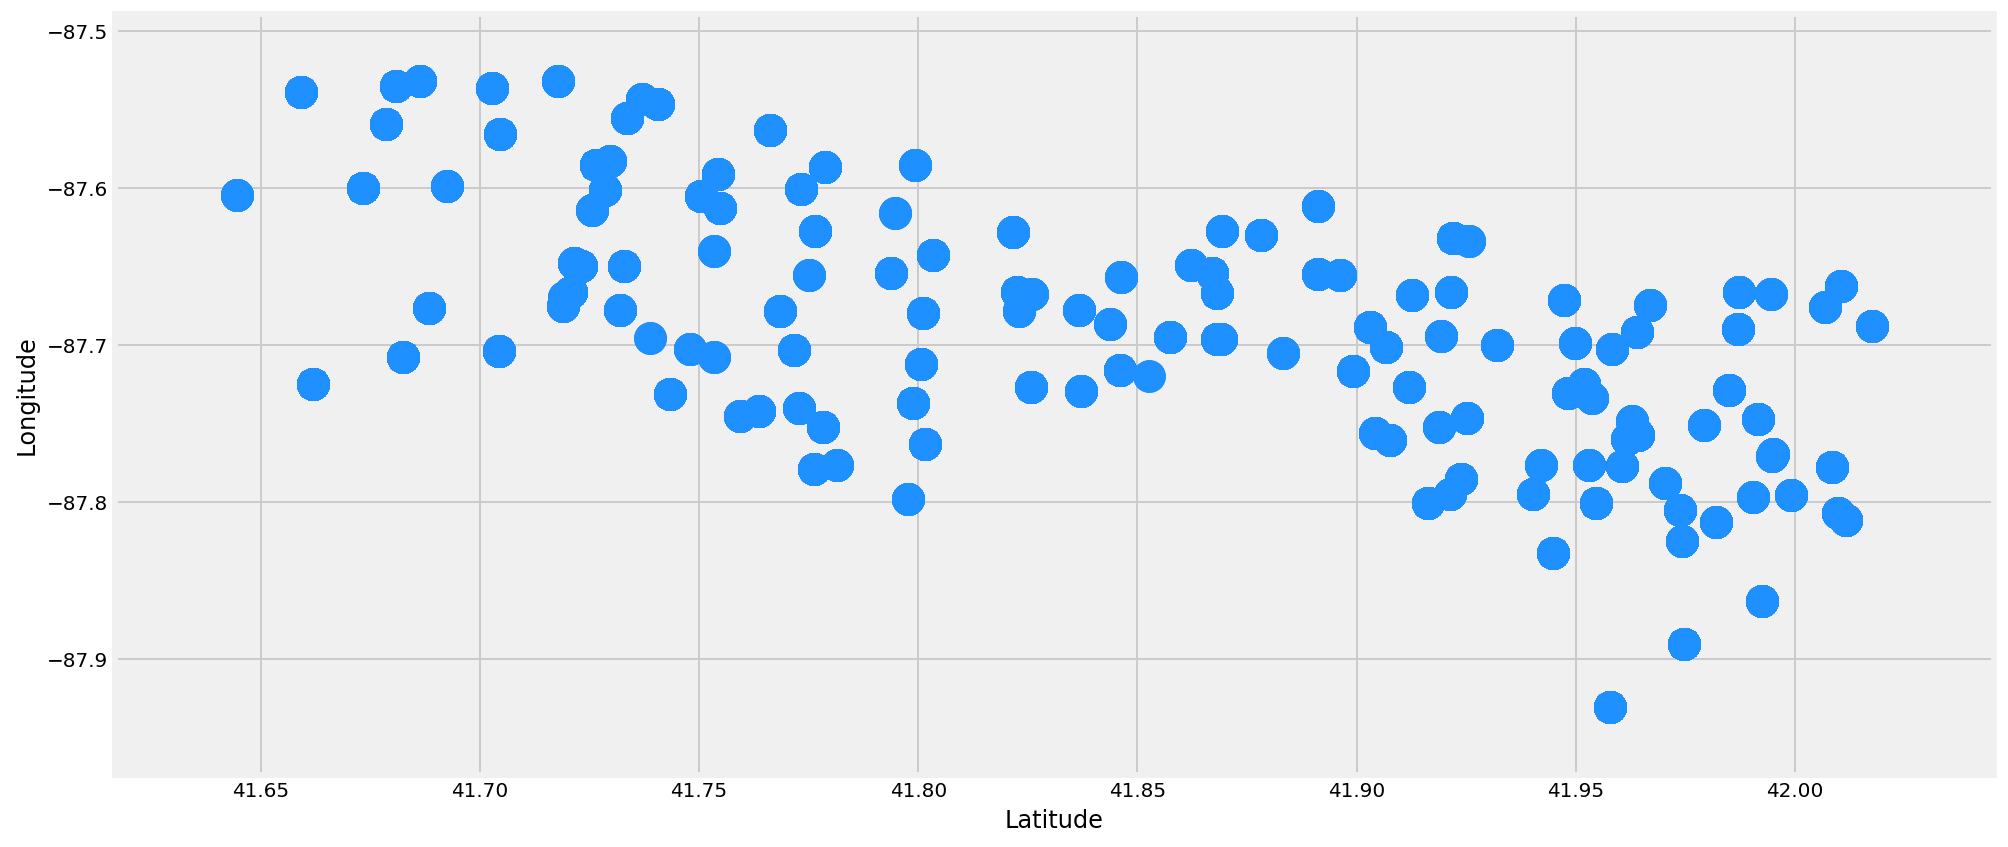

In [193]:
df.plot(x='Latitude', y='Longitude', kind='scatter', color='dodgerblue',\
        figsize=(15,7), s=250)

In [213]:
weather=pd.read_csv(weather_csv)
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [214]:
#station_dummy = pd.get_dummies(weather['Station'])
#station_dummy.head()

In [215]:
#weather = pd.concat([station_dummy, weather], axis=1)

In [216]:
# Replacing 'M' with avg temperature
#weather.Tavg = (weather.Tmax + weather.Tmin)/2
#weather = pd.DataFrame(weather.groupby('Date')['Tavg'].mean()).reset_index()

In [217]:
weather.isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

In [218]:
# replace some missing values and T with -1
weather = weather.replace('M', -1)
weather = weather.replace('-', -1)
weather = weather.replace('T', -1)
weather = weather.replace(' T', -1)
weather = weather.replace('  T', -1)

In [219]:
weather['Tavg'] = (weather['Tmax'] + weather['Tmin'])/2

In [221]:
# convert Tavg into int
weather['Tavg'] = weather['Tavg'].apply(lambda x: int(x))
weather['WetBulb'] = weather['WetBulb'].apply(lambda x: int(x))

In [222]:
# convert avg temp and wet bulb to degree celsius (Deduct 32, then multiply by 5, then divide by 9)
weather['Tavg_degree'] = (weather['Tavg']-32)*5/9
weather['WetBulb_degree'] = (weather['WetBulb']-32)*5/9

In [223]:
weather_clean = weather[['Station', 'Date', 'Tavg', 'Tavg_degree', 'WetBulb', 'WetBulb_degree']].copy()
weather_clean.sample(6)

,Station,Date,Tavg,Tavg_degree,WetBulb,WetBulb_degree
1126,1,2010-05-12,47,8.333333,46,7.777778
2809,2,2014-08-25,82,27.777778,74,23.333333
1148,1,2010-05-23,75,23.888889,69,20.555556
2425,2,2013-08-17,69,20.555556,62,16.666667
2622,1,2014-05-24,60,15.555556,52,11.111111
1571,2,2011-06-19,74,23.333333,69,20.555556


In [224]:
# difference between dry and wet bulb
weather_clean['diff'] = weather_clean['Tavg'] - weather_clean['WetBulb']

In [225]:
# 100 - ((350*(dry-wet))/dry)
weather_clean['Humidity'] = 100 - ((350*weather_clean['diff'])/weather_clean['Tavg'])
weather_clean['Humidity'] = weather_clean['Humidity'].apply(lambda x: round(x,2))

In [226]:
weather_clean.sample(10)

,Station,Date,Tavg,Tavg_degree,WetBulb,WetBulb_degree,diff,Humidity
1452,1,2010-10-22,48,8.888889,42,5.555556,3.333333,-31.25
1500,1,2011-05-15,43,6.111111,41,5.000000,1.111111,36.36
1523,2,2011-05-26,46,7.777778,43,6.111111,1.666667,25.00
1626,1,2011-07-17,82,27.777778,74,23.333333,4.444444,44.00
698,1,2008-10-13,69,20.555556,63,17.222222,3.333333,43.24
1801,2,2011-10-12,67,19.444444,58,14.444444,5.000000,10.00
2227,2,2013-05-10,47,8.333333,44,6.666667,1.666667,30.00
2654,1,2014-06-09,66,18.888889,55,12.777778,6.111111,-13.24
1223,2,2010-06-29,67,19.444444,59,15.000000,4.444444,20.00
2708,1,2014-07-06,75,23.888889,68,20.000000,3.888889,43.02


In [227]:
weather_clean[weather_clean['Station']==1]

,Station,Date,Tavg,Tavg_degree,WetBulb,WetBulb_degree,diff,Humidity
0,1,2007-05-01,66,18.888889,56,13.333333,5.555556,-2.94
2,1,2007-05-02,50,10.000000,47,8.333333,1.666667,41.67
4,1,2007-05-03,56,13.333333,48,8.888889,4.444444,-16.67
6,1,2007-05-04,57,13.888889,50,10.000000,3.888889,2.00
8,1,2007-05-05,59,15.000000,49,9.444444,5.555556,-29.63
10,1,2007-05-06,58,14.444444,46,7.777778,6.666667,-61.54
12,1,2007-05-07,65,18.333333,54,12.222222,6.111111,-16.67
14,1,2007-05-08,68,20.000000,62,16.666667,3.333333,41.67
16,1,2007-05-09,69,20.555556,63,17.222222,3.333333,43.24
18,1,2007-05-10,70,21.111111,60,15.555556,5.555556,7.89


In [241]:
weather_clean2=pd.DataFrame(weather_clean.groupby(['Date']).size().reset_index(name='counts'))
weather_clean2
#weather_clean2=nile.groupby(['Date']).size().reset_index(name='counts')

,Date,counts
0,2007-05-01,2
1,2007-05-02,2
2,2007-05-03,2
3,2007-05-04,2
4,2007-05-05,2
5,2007-05-06,2
6,2007-05-07,2
7,2007-05-08,2
8,2007-05-09,2
9,2007-05-10,2


In [244]:
nile_weather=weather_clean.merge(date_count,how='inner',on='Date')
nile_weather

,Station,Date,Tavg,Tavg_degree,WetBulb,WetBulb_degree,diff,Humidity,counts
0,1,2007-05-29,74,23.333333,65,18.333333,5.000000,25.00,25
1,2,2007-05-29,76,24.444444,66,18.888889,5.555556,20.45,25
2,1,2007-06-05,55,12.777778,51,10.555556,2.222222,39.13,60
3,2,2007-06-05,57,13.888889,52,11.111111,2.777778,30.00,60
4,1,2007-06-26,81,27.222222,72,22.222222,5.000000,35.71,70
5,2,2007-06-26,82,27.777778,72,22.222222,5.555556,30.00,70
6,1,2007-06-29,63,17.222222,59,15.000000,2.222222,54.84,46
7,2,2007-06-29,63,17.222222,60,15.555556,1.666667,66.13,46
8,1,2007-07-02,66,18.888889,58,14.444444,4.444444,17.65,74
9,2,2007-07-02,67,19.444444,59,15.000000,4.444444,20.00,74


In [42]:
def f(df):
    df = nile.copy()
    df['Year'] = DatetimeIndex(nile['Date']).year
    df['Month'] = DatetimeIndex(nile['Date']).month
    df['Day'] = DatetimeIndex(nile['Date']).day
    return df

f(df).head()

NameError: global name 'DatetimeIndex' is not defined